In [1]:
import urllib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn

# IMPORT DATA

In [2]:
#imported data from scikit.learn with help from Matt due to csv issues.

import urllib

In [3]:
urllib.request.urlretrieve("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", "diabetes.tab")

('diabetes.tab', <http.client.HTTPMessage at 0x7fe26eafa5b0>)

# FORMAT DATA INTO DATAFRAME

In [4]:
import pandas as pd

diabetes= pd.read_csv(
    "diabetes.tab",
    sep="\t" #re-formatted the dataframe to seperate columns
)
diabetes 

#KEY: AGE (yrs), SEX, BMI- body mass index, BP- blood pressure, S1- total serum cholesterol, S2- low-density lipoproteins, S3- high-density lipoproteins, S4- total cholesterol/HDL, S5- possibly log of serum triglycerides level, S6- blood sugar level, Y- disease progression one year after baseline

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


# FIND MEAN OF VARIABLES

In [5]:
diabetes.mean()

AGE     48.518100
SEX      1.468326
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64

# CREATE FILTER FOR SEX

In [6]:
sex1_filter = diabetes["SEX"] == 1 #filtered for sex although which number corresponds to male/female is unknown
sex1_filter

0      False
1       True
2      False
3       True
4       True
       ...  
437    False
438    False
439    False
440     True
441     True
Name: SEX, Length: 442, dtype: bool

In [7]:
diabetes[sex1_filter]

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
1,48,1,21.6,87.0,183,103.2,70.0,3.00,3.8918,69,75
3,24,1,25.3,84.0,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.00,4.1897,68,97
9,29,1,30.0,85.0,180,93.4,43.0,4.00,5.3845,88,310
...,...,...,...,...,...,...,...,...,...,...,...
434,53,1,26.5,97.0,193,122.4,58.0,3.00,4.1431,99,49
435,45,1,24.2,83.0,177,118.4,45.0,4.00,4.2195,82,64
436,33,1,19.5,80.0,171,85.4,75.0,2.00,3.9703,80,48
440,36,1,30.0,95.0,201,125.2,42.0,4.79,5.1299,85,220


In [8]:
sex2_filter = diabetes["SEX"] == 2
sex2_filter

0       True
1      False
2       True
3      False
4      False
       ...  
437     True
438     True
439     True
440    False
441    False
Name: SEX, Length: 442, dtype: bool

In [9]:
diabetes[sex2_filter]

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
6,36,2,22.0,90.00,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.00,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.00,179,119.4,42.0,4.00,4.4773,94,110
...,...,...,...,...,...,...,...,...,...,...,...
428,62,2,34.6,120.00,215,129.2,43.0,5.00,5.3660,123,310
431,68,2,23.5,101.00,162,85.4,59.0,3.00,4.4773,91,66
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104


# CREATE FILTER FOR OBESITY (USING BMI)

In [10]:
obesity_filter= diabetes["BMI"]>= 30
obesity_filter #created a filter for individuals with BMI equal to or more than 30 kg/m^2 (categorised as obese according to NHS, 2019)
diabetes[obesity_filter]

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.00,4.8598,87,151
2,72,2,30.5,93.0,156,93.6,41.0,4.00,4.6728,85,141
8,60,2,32.1,83.0,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.0,180,93.4,43.0,4.00,5.3845,88,310
16,47,1,30.3,109.0,207,100.2,70.0,3.00,5.2149,98,166
...,...,...,...,...,...,...,...,...,...,...,...
417,34,1,33.0,73.0,178,114.6,51.0,3.49,4.1271,92,55
422,27,2,33.6,110.0,246,156.6,57.0,4.00,5.0876,89,233
428,62,2,34.6,120.0,215,129.2,43.0,5.00,5.3660,123,310
432,51,1,31.5,93.0,231,144.0,49.0,4.70,5.2523,117,173


In [11]:
not_obese_filter=diabetes["BMI"]<= 29.9
not_obese_filter #created a filter for individuals with BMI equal to or less than 29.9 kg/m^2 (not categorised as obese according to NHS, 2019)
diabetes[not_obese_filter]

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.00,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.00,160,99.6,50.0,3.00,3.9512,82,138
...,...,...,...,...,...,...,...,...,...,...,...
436,33,1,19.5,80.00,171,85.4,75.0,2.00,3.9703,80,48
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132


# PLOT BMI VS. DIABETES PROGRESSION, RELATIVE TO SEX

In [12]:
sns.set_theme()

Text(29.92480659722223, 0.5, 'Disease progression one year post baseline')

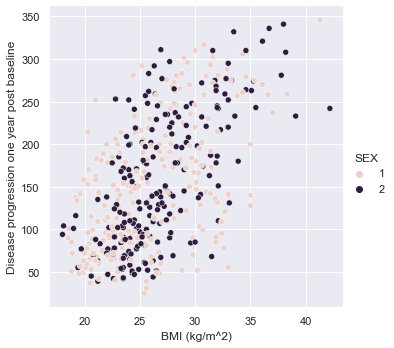

In [13]:
#created a plot of disease progression relative to BMI, labelled for sex
sns.relplot(data=diabetes, x="BMI", y="Y", hue="SEX") 
plt.xlabel("BMI (kg/m^2)")
plt.ylabel("Disease progression one year post baseline")
#Y refers to disease progression one year after baseline

Text(5.960000000000001, 0.5, 'Disease progression one year post baseline')

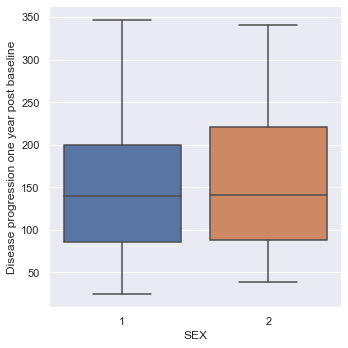

In [14]:
#create box plot to compare distribution of diabetes progression for both sexes
sns.catplot(data=diabetes, x="SEX", y="Y", kind="box")
plt.ylabel("Disease progression one year post baseline")


# SIMPLE LINEAR REGRESSION MODELS

In [15]:
#BMI vs. diabetes progression model
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

In [16]:
#define variables (X=predictor, y=target)
X = diabetes[["BMI"]]
y = diabetes["Y"]
model.fit(X,y)

LinearRegression()

In [17]:
diabetes["BMI"].max()

42.2

In [18]:
diabetes["BMI"].min()

18.0

In [19]:
x_fit = pd.DataFrame({"BMI": [18, 42.2]}) #found range of x values (BMI)
y_pred = model.predict(x_fit) #use known x values to plot line of best fit through data

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Disease progression one year post baseline')

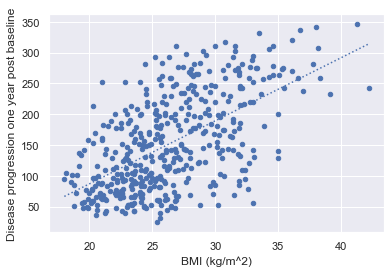

In [20]:
#present scatter plot of data with line of best fit

fig, ax = plt.subplots()
diabetes.plot.scatter("BMI", "Y", ax=ax)
ax.plot(x_fit["BMI"], y_pred, linestyle=":")
plt.xlabel("BMI (kg/m^2)")
plt.ylabel("Disease progression one year post baseline")

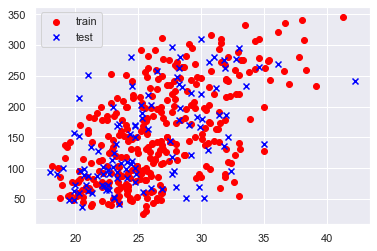

In [21]:
#linear regression model using train and test data to predict disease progression from BMI

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42) #haven't defined split of train/test data so set to default 75/25

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(train_X, train_y, color="red", marker="o", label="train")
ax.scatter(test_X, test_y, color="blue", marker="x", label="test")
ax.legend()

In [22]:
#fit model using training data
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(train_X, train_y)

LinearRegression()

In [23]:
#run model on test data... produces poor score (BMI is not a good predictor of diabetes progression)
model.score(test_X, test_y)

0.31720994495377797

In [24]:
#try simple linear regression model with Age, BP, Total_Chol (S1), LDL (S2), HDL (S3), Trigly (S5), Glucose (S6). See results report for model scores.

Attr = "S1" #define attribute/independent variable, substitute this variable in each simple linear regression

model = LinearRegression(fit_intercept=True)
X = diabetes[[Attr]]
y = diabetes["Y"]
model.fit(X,y)

LinearRegression()

In [25]:
Attr_max = diabetes[[Attr]].max()

In [26]:
Attr_min = diabetes[[Attr]].min()

In [27]:
x_fit = pd.DataFrame({Attr: [Attr_min,Attr_max]}) #input range of x values to fit line
y_pred = model.predict(x_fit)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


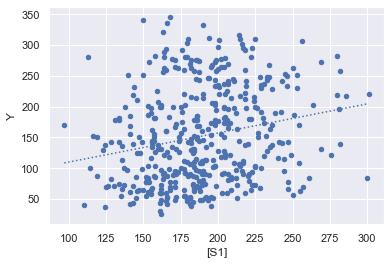

In [28]:
#make a plot of the predictive model

fig, ax = plt.subplots()
diabetes.plot.scatter([Attr], "Y", ax=ax)
ax.plot(x_fit[[Attr]], y_pred, linestyle=":")

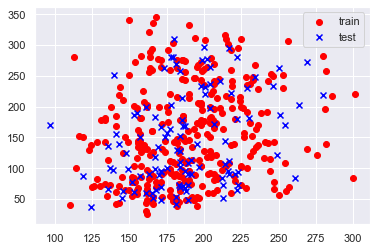

In [29]:
#split data into train and test
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42) #default split of train/test data 75/25

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(train_X, train_y, color="red", marker="o", label="train")
ax.scatter(test_X, test_y, color="blue", marker="x", label="test")
ax.legend()

In [30]:
#fit model to training data
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(train_X, train_y)

LinearRegression()

In [31]:
#run model on test data
model.score(test_X, test_y)

0.06626553266368596

# MULTIPLE LINEAR REGRESSION

In [32]:
#run multiple linear regression model with numerous variables this time to see if I can improve model score and diabetes progression prediction
#used BMI, HDL, Triglycerides and Blood sugar level in model

from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

Multi = pd.DataFrame(diabetes[["BMI","S3", "S5","S6"]]) #defining new data frame for X with variables of interest

X = Multi
y = diabetes["Y"]
model.fit(X,y)

LinearRegression()

In [33]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(train_X, train_y)

LinearRegression()

In [34]:
model.score(test_X, test_y) #get a better model score using multiple predictors (which are physiologically relevant to diabetes too)

0.5067149094831265

# CHECKING FOR COLLINEARITY

In [35]:
corr = diabetes.corr() 
print(corr) #print correlations between attributes

          AGE       SEX       BMI        BP        S1        S2        S3  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
S1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
S2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
S3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
S4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
S5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
S6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
Y    0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

           S4        S5        S6         Y  
AGE  0.203841  0.270774  0.30

<AxesSubplot:>

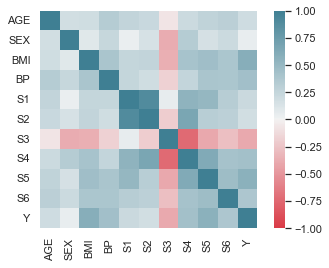

In [36]:
#create heat map of correlation between these variables
%matplotlib inline

cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap=cmap)

#linear regression assumption is that x variables are independent. Heat map suggests some collinearity (i.e., Trigly (S5) and BMI, Trigly (S5) and Total_Chol(S1)) so can try ridge regression to account for this.

# RIDGE REGRESSION TO ACCOUNT FOR COLLINEARITY (Help from C.Young)

In [37]:
from sklearn.linear_model import Ridge

In [38]:
#using same variables as before (BMI, HDL (S3), Triglycerides (S5) and Blood sugar level (S6))
model = Ridge(fit_intercept=True)

Multi = pd.DataFrame(diabetes[["BMI","S3","S5","S6"]])

X = Multi
y = diabetes["Y"]
model.fit(X,y)

Ridge()

In [39]:
#split train and test data as before to use with ridge model

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

from sklearn.linear_model import Ridge

model = Ridge(fit_intercept=True)
model.fit(train_X, train_y)

model.score(test_X, test_y) #slightly lower model score due to accounting for collinearity (reducing overfitting)

0.5055488016253997

#Find optimal alpha (discount factor) for model using gridsearch

In [40]:
from sklearn.model_selection import GridSearchCV

alpha = {
    'alpha' : np.linspace(0, 10, 100) 
}
#generating 100 values between 0 and 10 to find optimum alpha value for model

model_ridge = GridSearchCV(Ridge(), alpha)

model_ridge.fit(train_X, train_y)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727...
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96969697,
        7.07070707,  7.17171717,  7.27272727,  7.37373737,  7.47474747,
        7.57575758,  7.67676768,  7.77777778,  7.87878788,  7.97979798,
        8.08080808,  8.18181818,  8.28282828,  8.38383838,  8.48484848,
        8.58585859,  8.68686869,  8.78787879,  8.88888889,  8.98989899,
        9.09090909,  9.19191919,  9.29292929,  9.39393939,  9.49494949,
        9.5959596 ,  9.6969697 ,  9.7979798 ,  9.8989899 , 10.        ])})

In [41]:
cv_results = pd.DataFrame(model_ridge.cv_results_) #make dataframe of CV results
print(cv_results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.004115      0.001215         0.003892        0.002153         0.0   
1        0.002992      0.001469         0.001869        0.000357     0.10101   
2        0.002412      0.000376         0.001537        0.000154     0.20202   
3        0.002102      0.000031         0.001432        0.000018     0.30303   
4        0.002083      0.000017         0.001420        0.000013     0.40404   
..            ...           ...              ...             ...         ...   
95       0.002046      0.000065         0.001403        0.000027     9.59596   
96       0.002067      0.000076         0.001419        0.000082     9.69697   
97       0.001989      0.000011         0.001382        0.000021     9.79798   
98       0.002024      0.000035         0.001410        0.000045     9.89899   
99       0.001997      0.000017         0.001371        0.000016        10.0   

                            params  spl

In [42]:
#aiming to filter out maximum alpha value from the Gridsearch results to use in ridge regression model.

cv_results_filter = cv_results['mean_test_score'] == cv_results['mean_test_score'].max() #creating filter to find max score amongst 'mean_test_score' column of CV results

cv_results_filtered = cv_results[cv_results_filter] #make dataframe with only max score row from CV results

alpha = cv_results_filtered['param_alpha'] #identify alpha in 'param_alpha' column that corresponds to max score

print(alpha)

1    0.10101
Name: param_alpha, dtype: object


In [43]:
model_ridge= Ridge(alpha=0.10101)

#RE-RUN RIDGE MODEL WITH OPTIMAL ALPHA VALUE

In [44]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

model_ridge = Ridge(fit_intercept=True)
model_ridge.fit(train_X, train_y)

model_ridge.score(test_X, test_y)
#same model score as without 'best' alpha value

0.5055488016253997